In [17]:
### Plot a timeline of Sandwich data

import numpy as np
import  json
#from  shapely.geometry  import Polygon, Point
#import shapely.ops as shops
#from descartes.patch import PolygonPatch
#import shapely.vectorized
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#import xarray as xr
#import hvplot.xarray
import pandas as pd
from IPython.display import display, HTML
#from scipy import interpolate, signal
#from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
%matplotlib inline

In [58]:
map_dates = ([\
         "22-Jan-2016",\
         "25-Jan-2016",\
         "11-Feb-2016",\
         "30-Mar-2016",\
         "21-Sep-2016",\
         "09-Jan-2017",\
         "25-Jan-2017",\
         "14-Feb-2017",\
         "16-Mar-2017",\
         "28-Apr-2017",\
         "04-May-2017",\
         "18-Sep-2017",\
         "03-Jan-2018",\
         "10-Jan-2018",\
         "09-Mar-2018"]
         )
map_dt = np.array([ datetime.strptime(map_dates[i], '%d-%b-%Y') for i in range (len(map_dates))])
map_qual = np.array([2,1,1,2,1,1,1,1,1,1,1,1,0,0,0])

# plot axis
plt_dates = ["1-Jan-2016","1-Apr-2018"]
plt_dt = np.array([ datetime.strptime(plt_dates[i], '%d-%b-%Y') for i in range (len(plt_dates))])

# beachcam
bc_dates = ["21-Dec-2015","2-Mar-2018"]
bc_dt = np.array([ datetime.strptime(bc_dates[i], '%d-%b-%Y') for i in range (len(bc_dates))])

# CDIP 221
buoy_dates = ["20-May-2016","31-Mar-2018"]
buoy_dt = np.array([ datetime.strptime(buoy_dates[i], '%d-%b-%Y') for i in range (len(buoy_dates))])

# 2016 Nanopod
npod_dates = ['2-Feb-2016','20-May-2016']
npod_dt = np.array([ datetime.strptime(npod_dates[i], '%d-%b-%Y') for i in range (len(npod_dates))])
              
# 2017 Quadpod
qpod_dates = ['17-Dec-2016','25-May-2017']
qpod_dt = np.array([ datetime.strptime(qpod_dates[i], '%d-%b-%Y') for i in range (len(qpod_dates))])

# Overwash measurements
ow1_dates =['21-Jan-2016','24-Jan-2016']
ow1_dt = np.array([ datetime.strptime(ow1_dates[i], '%d-%b-%Y') for i in range (len(ow1_dates))])
              
# Overwash measurements
ow2_dates =['23-Jan-2017','26-Jan-2017']
ow2_dt = np.array([ datetime.strptime(ow2_dates[i], '%d-%b-%Y') for i in range (len(ow2_dates))])
              
# Overwash measurements
ow3_dates =['08-Feb-2017','10-Feb-2017']
ow3_dt = np.array([ datetime.strptime(ow3_dates[i], '%d-%b-%Y') for i in range (len(ow3_dates))])
              
# Overwash measurements
ow4_dates =['13-Feb-2017','14-Feb-2017']
ow4_dt = np.array([ datetime.strptime(ow4_dates[i], '%d-%b-%Y') for i in range (len(ow4_dates))])
              
# Overwash measurements
ow5_dates =['13-Mar-2017','15-Mar-2017']
ow5_dt = np.array([ datetime.strptime(ow5_dates[i], '%d-%b-%Y') for i in range (len(ow5_dates))])

# D|Wave measurements at groin
dwave_dates = ['10-May-2017','16-Jun-2017']
dwave_dt = np.array([ datetime.strptime(dwave_dates[i], '%d-%b-%Y') for i in range (len(dwave_dates))])

# D|Wave measurements at groin
dwave2_dates = ['21-Apr-2016','04-May-2016']
dwave2_dt = np.array([ datetime.strptime(dwave2_dates[i], '%d-%b-%Y') for i in range (len(dwave2_dates))])

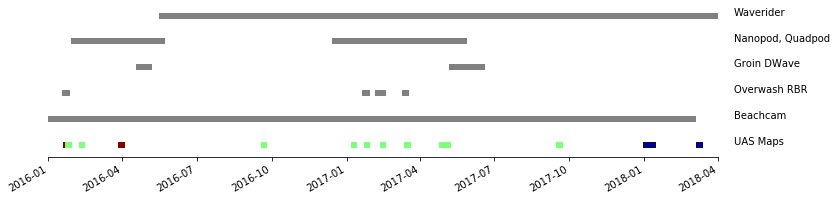

In [61]:
day = timedelta(days=1)
fig, ax = plt.subplots(figsize=(12,3))


# buoy
plt.plot(buoy_dt,[2.75]*len(dwave_dt), linewidth=6, color='gray')
plt.text(plt_dt[-1]+20*day,2.75,'Waverider')

# Nano, quadpod
plt.plot(npod_dt,[2.25]*len(npod_dt), linewidth=6, color='gray')
plt.plot(qpod_dt,[2.25]*len(qpod_dt), linewidth=6, color='gray')

plt.text(plt_dt[-1]+20*day,2.25,'Nanopod, Quadpod')

# Dwave
plt.plot(dwave_dt,[1.75]*len(dwave_dt), linewidth=6, color='gray')
plt.plot(dwave2_dt,[1.75]*len(dwave2_dt), linewidth=6, color='gray')

plt.text(plt_dt[-1]+20*day,1.75,'Groin DWave')

# Owash measurements
plt.plot(ow1_dt,[1.25]*len(ow1_dt), linewidth=6, color='gray')
plt.plot(ow2_dt,[1.25]*len(ow2_dt), linewidth=6, color='gray')
plt.plot(ow3_dt,[1.25]*len(ow3_dt), linewidth=6, color='gray')
plt.plot(ow4_dt,[1.25]*len(ow4_dt), linewidth=6, color='gray')
plt.plot(ow5_dt,[1.25]*len(ow5_dt), linewidth=6, color='gray')
plt.text(plt_dt[-1]+20*day,1.25,'Overwash RBR')

# Overwash observations


# beach cam
plt.plot(bc_dt,[.75]*len(bc_dt), linewidth=6, color='gray')
plt.text(plt_dt[-1]+20*day,.75,'Beachcam')

# maps
ax.scatter(map_dt, [.25]*len(map_dt), c=map_qual, cmap=plt.cm.jet,
           marker='s', s=30)
plt.text(plt_dt[-1]+20*day,.25,'UAS Maps')

fig.autofmt_xdate()
# everything after this is turning off stuff that's plotted by default

ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.get_yaxis().set_ticklabels([])

#plt.xlim(map_dt[0] - day, map_dt[-1] + day)

plt.xlim(plt_dt[0], plt_dt[-1])
plt.ylim(0,2.85)
plt.show()

In [60]:
day

datetime.timedelta(1)